# Проект: Статистический анализ данных

### Передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Нужно проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти. 

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

#### Шаг 1. Загрузка данных

In [2]:
dt_users = pd.read_csv('/datasets/users_go.csv')
dt_rides = pd.read_csv('/datasets/rides_go.csv')
dt_subs = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
dt_users.shape

(1565, 5)

In [4]:
dt_rides.shape

(18068, 4)

In [5]:
dt_subs.shape

(2, 4)

In [6]:
dt_users.columns

Index(['user_id', 'name', 'age', 'city', 'subscription_type'], dtype='object')

In [7]:
dt_rides.columns

Index(['user_id', 'distance', 'duration', 'date'], dtype='object')

In [8]:
dt_subs.columns

Index(['subscription_type', 'minute_price', 'start_ride_price',
       'subscription_fee'],
      dtype='object')

In [9]:
dt_users.head(20)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [10]:
dt_rides.head(20)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [11]:
dt_subs.head(20)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [12]:
dt_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [13]:
dt_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [14]:
dt_subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


#### Шаг 2. Предобработка данных

In [15]:
dt_rides['date'].head()

0    2021-01-01
1    2021-01-18
2    2021-04-20
3    2021-08-11
4    2021-08-28
Name: date, dtype: object

In [16]:
dt_rides['date'] = pd.to_datetime(dt_rides['date'], format='%Y-%m-%d')

In [17]:
dt_rides['date_month'] = pd.DatetimeIndex(dt_rides['date']).month

In [18]:
dt_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18068 non-null  int64         
 1   distance    18068 non-null  float64       
 2   duration    18068 non-null  float64       
 3   date        18068 non-null  datetime64[ns]
 4   date_month  18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


In [19]:
def skips_and_duplicates_checker(dt_smth):
    print(dt_smth.isna().sum())
    print()
    print(dt_smth.duplicated().sum())

In [20]:
skips_and_duplicates_checker(dt_users)

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

31


In [21]:
skips_and_duplicates_checker(dt_rides)

user_id       0
distance      0
duration      0
date          0
date_month    0
dtype: int64

0


In [22]:
skips_and_duplicates_checker(dt_subs)

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

0


In [23]:
dt_users = dt_users.drop_duplicates().reset_index(drop=True)

In [24]:
dt_users.duplicated().sum()

0

#### Шаг 3. Исследовательский анализ данных

In [25]:
dt_users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [26]:
dt_users['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

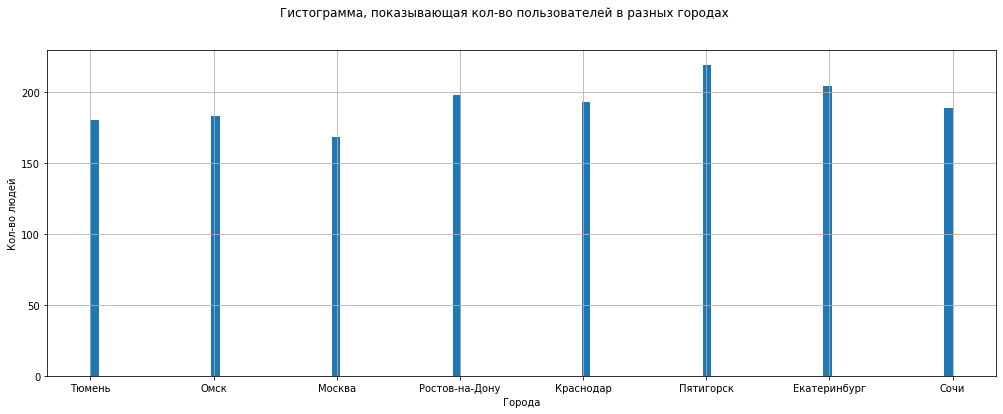

In [27]:
dt_users['city'].hist(bins=100, figsize=(17, 6))
plt.suptitle('Гистограмма, показывающая кол-во пользователей в разных городах ')
plt.ylabel('Кол-во людей')
plt.xlabel('Города');

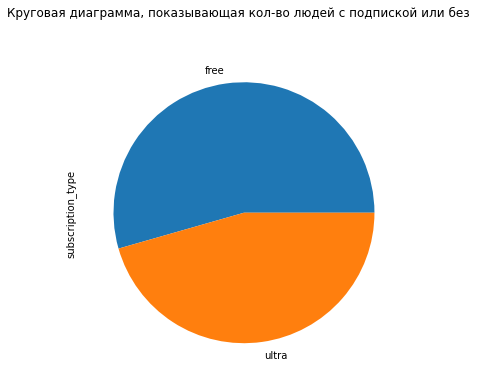

In [28]:
dt_users['subscription_type'].value_counts().plot(y='subscription_type', kind='pie', figsize=(6,6));
plt.suptitle('Круговая диаграмма, показывающая кол-во людей с подпиской или без');

In [29]:
print("Соотношение людей с подпиской к людям без:",
    len(dt_users[dt_users['subscription_type'] == 'ultra']) / 
    len(dt_users[dt_users['subscription_type'] == 'free'])
)
print("Соотношение людей с подпиской ко всем людям:", len(dt_users[dt_users['subscription_type'] == 'ultra']) / len(dt_users))
print("Соотношение людей без подписки ко всем людям:", len(dt_users[dt_users['subscription_type'] == 'free']) / len(dt_users))
      

Соотношение людей с подпиской к людям без: 0.837125748502994
Соотношение людей с подпиской ко всем людям: 0.4556714471968709
Соотношение людей без подписки ко всем людям: 0.5443285528031291


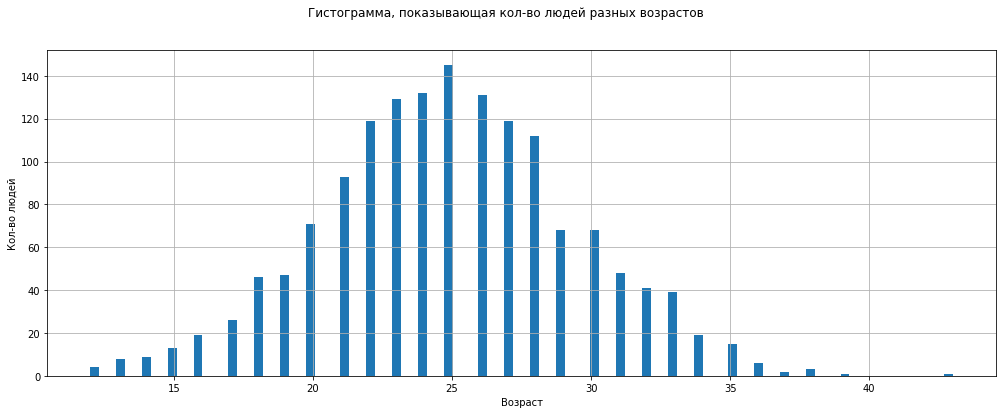

In [30]:
dt_users['age'].hist(bins=100, figsize=(17, 6))
plt.suptitle('Гистограмма, показывающая кол-во людей разных возрастов')
plt.ylabel('Кол-во людей')
plt.xlabel('Возраст');

Из увиденного можно сделать вывод, что самокаты бóльшим спросом пользуются у людей от 23 до 26. 

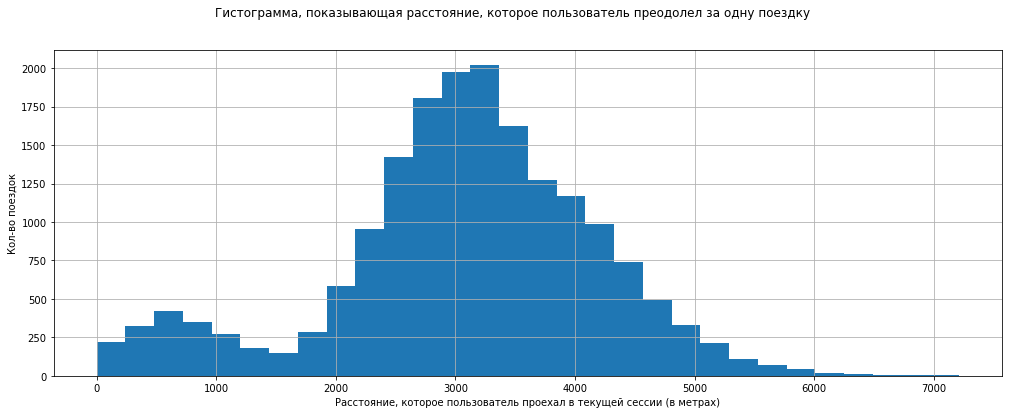

In [31]:
dt_rides['distance'].hist(bins=30, figsize=(17, 6))
plt.suptitle('Гистограмма, показывающая расстояние, которое пользователь преодолел за одну поездку')
plt.ylabel('Кол-во поездок')
plt.xlabel('Расстояние, которое пользователь проехал в текущей сессии (в метрах)');

Образовалось 2 пика. Тот, что находится на отметке в 3000 метров, по моим предположениям, относится к тем случаям, когда расстояние слишком близкое, чтобы вызвать такси и слишком далёкое, чтобы пройти пешком. Поэтому берут самокат.

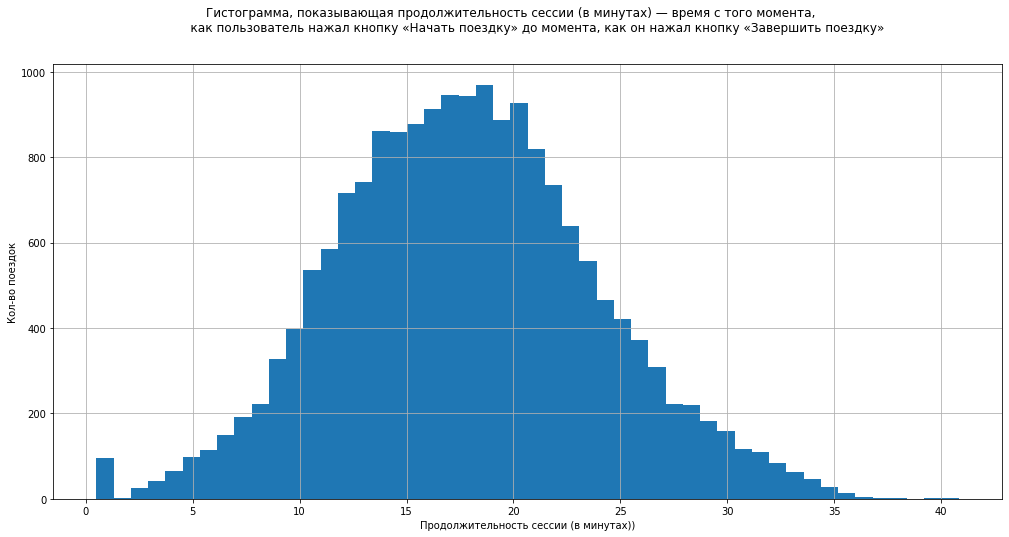

In [32]:
dt_rides['duration'].hist(bins=50, figsize=(17, 8))
plt.suptitle('''Гистограмма, показывающая продолжительность сессии (в минутах) — время с того момента, 
             как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»''')
plt.ylabel('Кол-во поездок')
plt.xlabel('Продолжительность сессии (в минутах))');

В основном люди берут самокаты на 15-20 минут. Скорее всего по тем же причинам, что и с расстоянием: расстояние слишком близкое, чтобы вызвать такси и слишком далёкое, чтобы пройти пешком. Так же есть небольшой скачок на 1 минуте и почти со 100% вероятностью это люди, которые арендовали самокат и сразу же по каким-то причинам отменили аренду.

#### Шаг 4. Объединение данных

In [33]:
dt_all = dt_users.merge(dt_rides, on='user_id', how='outer')
dt_all = dt_all.merge(dt_subs, on='subscription_type')
dt_all.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,date_month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


In [34]:
skips_and_duplicates_checker(dt_all)

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
date_month           0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

0


In [35]:
dt_ultra = dt_all[dt_all['subscription_type'] == 'ultra']
dt_free = dt_all[dt_all['subscription_type'] == 'free']

3148.6372291760854
3114.648464847295


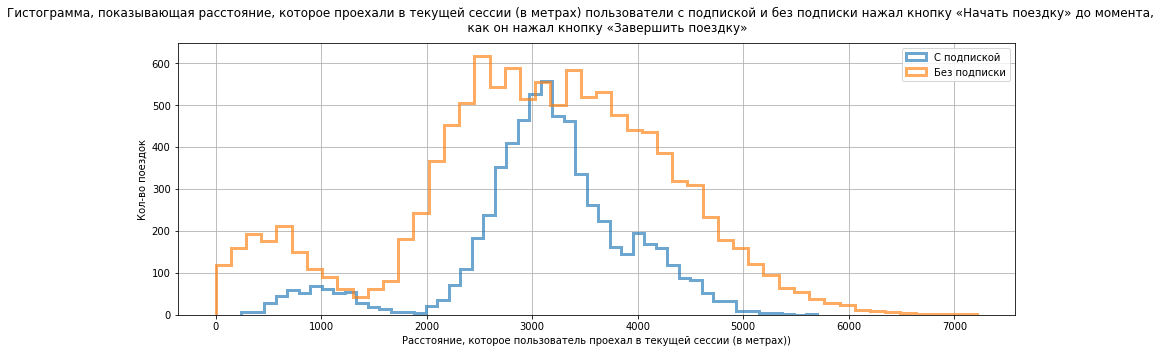

In [36]:
ax = dt_ultra.plot(
    kind='hist',
    y='distance',
    histtype='step',
    bins=50,
    linewidth=3,
    alpha=0.65,
    label='С подпиской',
)
dt_free.plot(
    kind='hist',
    y='distance',
    histtype='step',
    bins=50,
    linewidth=3,
    alpha=0.65,
    label='Без подписки',
    ax=ax,
    grid=True,
    legend=True,
    figsize=(15, 5)
);
plt.suptitle('''Гистограмма, показывающая расстояние, которое проехали в текущей сессии (в метрах) пользователи с подпиской и без подписки нажал кнопку «Начать поездку» до момента, 
             как он нажал кнопку «Завершить поездку»''')
plt.ylabel('Кол-во поездок')
plt.xlabel('Расстояние, которое пользователь проехал в текущей сессии (в метрах))');

print(dt_ultra['distance'].median())
print(dt_free['distance'].median())

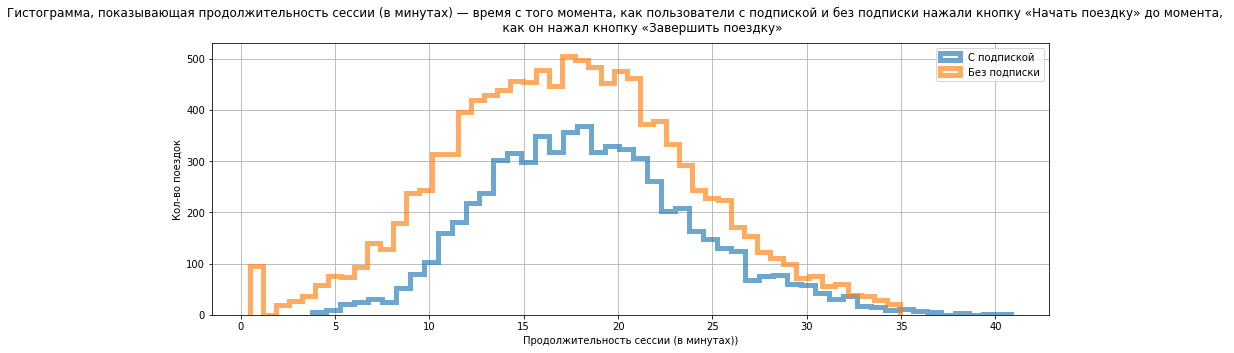

In [37]:
ax = dt_ultra.plot(
    kind='hist',
    y='duration',
    histtype='step',
    bins=50,
    linewidth=5,
    alpha=0.65,
    label='С подпиской',
)
dt_free.plot(
    kind='hist',
    y='duration',
    histtype='step',
    bins=50,
    linewidth=5,
    alpha=0.65,
    label='Без подписки',
    ax=ax,
    grid=True,
    legend=True,
    figsize=(15, 5)
);
plt.suptitle('''Гистограмма, показывающая продолжительность сессии (в минутах) — время с того момента, как пользователи с подпиской и без подписки нажали кнопку «Начать поездку» до момента, 
             как он нажал кнопку «Завершить поездку»''')
plt.ylabel('Кол-во поездок')
plt.xlabel('Продолжительность сессии (в минутах))');

#### Шаг 5. Подсчёт выручки

In [38]:
dt_all['duration'] = np.ceil(dt_all['duration'])
dt_all

,user_id,name,age,city,subscription_type,distance,duration,date,date_month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,20.0,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,22.0,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,19.0,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,17.0,2021-11-27,11,8,50,0


In [39]:
dt_merge = dt_all.groupby(
    ['date_month', 'user_id', 'subscription_type']).agg(
        {'user_id' : 'count', 
         'subscription_fee' : 'mean', 
         'start_ride_price' : 'mean', 
         'minute_price' : 'mean',
         'duration' : 'sum'
        }
    )
dt_merge['cost'] = (
    dt_merge['user_id'] * dt_merge['start_ride_price'] 
    + dt_merge['duration'] * dt_merge['minute_price']
    + dt_merge['subscription_fee']
)
dt_merge

user_id  subscription_fee  \
date_month user_id subscription_type                              
1          1       ultra                    2               199   
           3       ultra                    1               199   
           5       ultra                    1               199   
           7       ultra                    2               199   
           12      ultra                    1               199   
...                                       ...               ...   
12         1525    free                     1                 0   
           1526    free                     1                 0   
           1528    free                     1                 0   
           1532    free                     2                 0   
           1534    free                     1                 0   

                                      start_ride_price  minute_price  \
date_month user_id subscription_type                                   
1          1       ultra                             0             6   
           3       ultra                             0             6   
           5       ultra                             0             6   
           7       ultra                             0             6   
           12      ultra                             0             6   
...                                                ...           ...   
12         1525    free                             50             8   
           1526    free                             50             8   
           1528    free                             50             8   
           1532    free                             50             8   
           1534    free                             50             8   

                                      duration   cost  
date_month user_id subscription_type                   
1          1       ultra                  42.0  451.0  
           3       ultra                  13.0  277.0  
           5       ultra                  13.0  277.0  
           7       ultra                  28.0  367.0  
           12      ultra                  33.0  397.0  
...                                        ...    ...  
12         1525    free                   34.0  322.0  
           1526    free                   23.0  234.0  
           1528    free                   11.0  138.0  
           1532    free                   42.0  436.0  
           1534    free                   16.0  178.0  

[11331 rows x 6 columns]

In [40]:
dt_merge1 = dt_all.pivot_table(
    index=['date_month', 'user_id', 'subscription_type'],
    values=['duration', 'distance'], 
    aggfunc='sum'
)
dt_merge1[['count', 'cost']] = dt_merge[['user_id', 'cost']]
dt_merge1 = dt_merge1.reset_index()
dt_merge1

,date_month,user_id,subscription_type,distance,duration,count,cost
0,1,1,ultra,7027.511294,42.0,2,451.0
1,1,3,ultra,3061.777147,13.0,1,277.0
2,1,5,ultra,3914.646990,13.0,1,277.0
3,1,7,ultra,6478.080979,28.0,2,367.0
4,1,12,ultra,3577.151148,33.0,1,397.0
...,...,...,...,...,...,...,...
11326,12,1525,free,4597.854350,34.0,1,322.0
11327,12,1526,free,3644.121544,23.0,1,234.0
11328,12,1528,free,3998.569324,11.0,1,138.0
11329,12,1532,free,6111.889853,42.0,2,436.0


#### Шаг 6. Проверка гипотез

In [41]:
dt_all

,user_id,name,age,city,subscription_type,distance,duration,date,date_month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,20.0,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,22.0,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,19.0,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,17.0,2021-11-27,11,8,50,0


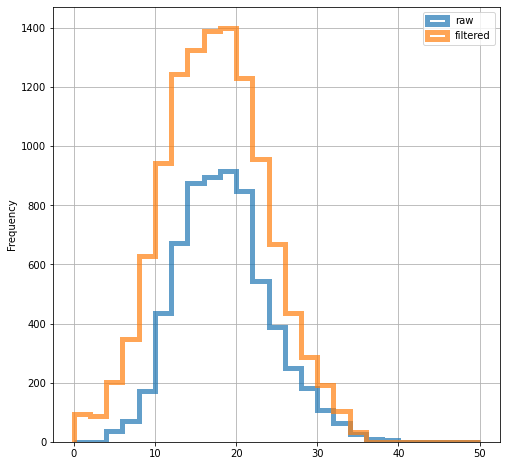

In [42]:
ax = dt_ultra.plot(
    kind='hist',
    y='duration',
    histtype='step',
    range=(0, 50),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='raw',
)
dt_free.plot(
    kind='hist',
    y='duration',
    histtype='step',
    range=(0, 50),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='filtered',
    ax=ax,
    grid=True,
    legend=True,
    figsize=(8, 8)
);

### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? 

Нулевая гипотеза: Среднее время, 
которое тратят пользователи с подпиской за одну поездку больше или равно среднему времени, 
которое тратят пользователи без подписки за одну поездку. 

Альтернативная гипотеза: Среднее время, 
которое тратят пользователи с подпиской за одну поездку меньше среднего времени, 
которое тратят пользователи без подписки за одну поездку.


In [43]:
print('Средняя продолжительность пользователей с подпиской: ', np.mean(dt_ultra['duration']))
print('Средняя продолжительность пользователей без подписки: ', np.mean(dt_free['duration']))
print()

alpha = 0.05

results = st.ttest_ind(
    dt_ultra['duration'], dt_free['duration'], alternative='less'
)

# вывод об отвержении или неотвержении нулевой гипотезы
if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу и рассматриваем альтернативную')
else:
    print('He получилось отвергнуть нулевую гипотезу')

Средняя продолжительность пользователей с подпиской:  18.54198516280583
Средняя продолжительность пользователей без подписки:  17.39090929866399

He получилось отвергнуть нулевую гипотезу


### Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

Нулевая гипотеза: помесячная выручка от пользователей с подпиской по месяцам выше или равна, чем выручка от пользователей без подписки.

Альтернативная гипотеза: помесячная выручка от пользователей с подпиской по месяцам меньше, чем выручка от пользователей без подписки.

In [44]:
print('Средняя выручка пользователей с подпиской: ', 
      np.mean(
          dt_merge1.loc[dt_merge1['subscription_type'] == 'ultra', 'cost']
      )
)
print('Средняя вырчука пользователей без подписки: ', np.mean(
    dt_merge1.loc[dt_merge1['subscription_type'] == 'free', 'cost']
    )
)
print()

alpha = 0.05

results = st.ttest_ind(
    dt_merge1.loc[dt_merge1['subscription_type'] == 'ultra', 'cost'], 
    dt_merge1.loc[dt_merge1['subscription_type'] == 'free', 'cost'], 
    alternative='less'
)

# вывод об отвержении или неотвержении нулевой гипотезы
if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу и рассматриваем альтернативную')
else:
    print('He получилось отвергнуть нулевую гипотезу')
    


Средняя выручка пользователей с подпиской:  362.7921906022502
Средняя вырчука пользователей без подписки:  328.6413651073845

He получилось отвергнуть нулевую гипотезу


Вывод: Наиболее вероятно, что помесячная выручка от пользователей с подписко будет больше, чем у пользователей без подписки

### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

Нулевая гипотеза: Среднее расстояние, 
которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. 

Альтернативная гипотеза: Среднее расстояние, 
которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров.

In [45]:
distance = 3130

alpha = 0.05
results = st.ttest_1samp(dt_ultra['distance'], distance, alternative='greater')

if results.pvalue < alpha:
    print('Ответ: Альтернативная гипотеза имеет больший шанс быть истинной')
else:
    print('Ответ: Нулевая гипотеза наиболее вероятна')


Ответ: Нулевая гипотеза наиболее вероятна


6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Ответ: Двухвыборочный t-тест для зависимых выборок. Если говорить про код, то scipy.ttest_rel

### Вывод: 
По изученным данным можно сказать, что пользователи с подпиской приносят бóльшую пользу, чем пользователи без неё. Потому что если рассмотреть все графики и выводы, то получается так, что они по времени ездят примерно столько же или больше, чем люди без подписки, не проезжают больше 3130 метров, поэтому не заставляют самокат быстрее изнашиваться и помесячная вырчка от них больше. Поэтому для компании наилучшим вариантом будет нацелиться на пользователей без подписки и какими-либо методами сподвигнуть их к её приобретению 